In [1]:
#import the important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#reading the given excel 
#1st we will read orders sheet
orders = pd.read_excel("Retail_dataset.xlsx",sheet_name = "orders")


In [4]:
orders.shape

(99441, 7)

In [5]:
#checking if there are any duplicate entries for order_id
orders.order_id.duplicated().sum()

0

In [6]:
#just checking if customer_id is duplicated 
orders.customer_id.value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
d6fe1d8f8260d270ec05c8b3065c8eaa     1
8c0386035e15f02612c89d29d7694b41     1
c1c0e094a7fbde66794da6ee9f9d1dda     1
6d90b4cc432b22857f3660864f240b0c     1
60350aa974b26ff12caad89e55993bd6     1
Name: customer_id, Length: 96096, dtype: int64

In [7]:
# as per the problem statement states we have to 
orders = orders[orders.order_status=="delivered"]
orders.shape

(96478, 7)

In [8]:
orders.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_timestamp         8
order_estimated_delivery_date     0
dtype: int64

In [9]:
orders.order_approved_at.fillna(orders.order_purchase_timestamp, inplace=True)

In [10]:
orders.order_delivered_timestamp.fillna(orders.order_estimated_delivery_date, inplace=True)

In [11]:
orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

In [12]:
order_items = pd.read_excel("Retail_dataset.xlsx",sheet_name = "order_items")
order_items.shape

(112650, 6)

In [13]:
order_items.isnull().sum()

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

In [14]:
order_items.duplicated().sum()

0

In [15]:
customers = pd.read_excel("Retail_dataset.xlsx",sheet_name = "customers")
customers.shape

(99441, 4)

In [16]:
customers.isna().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [17]:
customers.customer_id.duplicated().sum()

3345

In [18]:
customers.drop_duplicates(subset='customer_id',keep = 'first',inplace =True)

In [19]:
customers.shape

(96096, 4)

In [20]:
payments = pd.read_excel("Retail_dataset.xlsx",sheet_name = 'payments')
payments.shape

(103886, 5)

In [21]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [22]:
payments.duplicated().sum()

0

In [23]:
products = pd.read_excel("Retail_dataset.xlsx",sheet_name='products')
products.shape

(32951, 6)

In [24]:
products.isna().sum()

product_id                 0
product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
dtype: int64

In [25]:
products.product_category_name.value_counts()

toys                                 24725
bed_bath_table                         789
sports_leisure                         721
furniture_decor                        687
health_beauty                          648
                                     ...  
fashion_childrens_clothes                1
diapers_and_hygiene                      1
home_comfort_2                           1
security_and_services                    1
furniture_mattress_and_upholstery        1
Name: product_category_name, Length: 70, dtype: int64

In [26]:
products.product_category_name.value_counts(normalize=True)*100

toys                                 75.424789
bed_bath_table                        2.406882
sports_leisure                        2.199445
furniture_decor                       2.095726
health_beauty                         1.976755
                                       ...    
fashion_childrens_clothes             0.003051
diapers_and_hygiene                   0.003051
home_comfort_2                        0.003051
security_and_services                 0.003051
furniture_mattress_and_upholstery     0.003051
Name: product_category_name, Length: 70, dtype: float64

In [27]:
products.product_category_name.mode()[0]

'toys'

In [28]:
products.product_category_name.fillna(products.product_category_name.mode()[0],inplace = True)

In [29]:
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


In [30]:
num_cols = list(products.describe().columns)

In [31]:
num_cols

['product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

In [32]:
plt.style.use

<function matplotlib.style.core.use(style)>

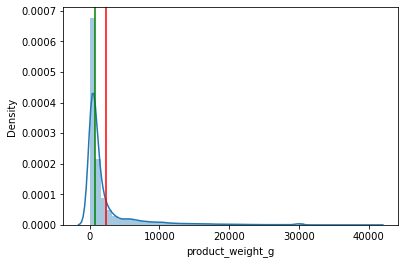

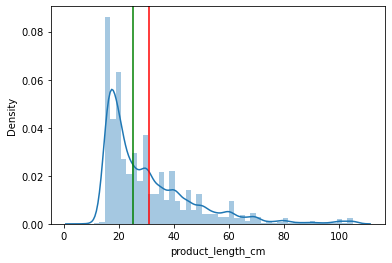

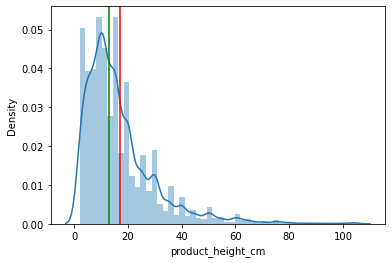

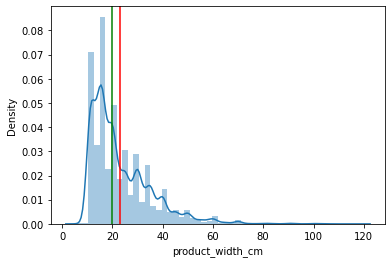

In [33]:
for n in num_cols:
    sns.distplot(products[n])
    plt.axvline(products[n].mean(),color='red')
    plt.axvline(products[n].median(),color='green')
    plt.show()
    print("="*65)

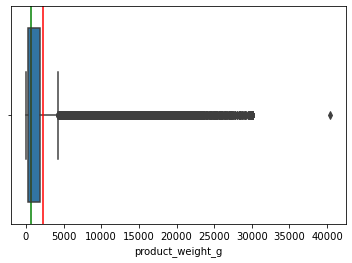

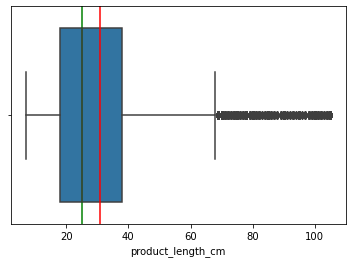

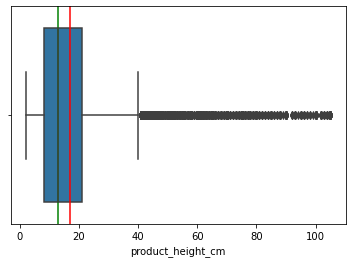

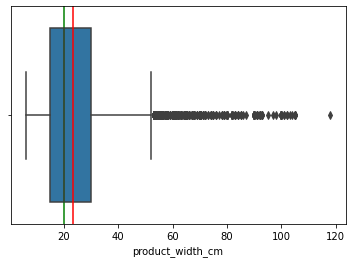

In [34]:
for n in num_cols:
    sns.boxplot(products[n])
    plt.axvline(products[n].mean(),color='red')
    plt.axvline(products[n].median(),color='green')
    plt.show()
    print("="*65)

In [35]:
for n in num_cols:
    products[n].fillna(products[n].median(),inplace=True)

In [36]:
products.isna().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

In [67]:
writer = pd.ExcelWriter('cleaned_retail_data.xlsx',engine='xlsxwriter')

orders.to_excel(writer,sheet_name='orders')

order_items.to_excel(writer,sheet_name='order_items')

customers.to_excel(writer,sheet_name='customers')

payments.to_excel(writer,sheet_name='payments')

products.to_excel(writer,sheet_name='products')

writer.save()